<a href="https://colab.research.google.com/github/Ishaang19/FML/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [4]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(x,y,test_size=0.25,random_state=0)
print(xt)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xt=sc.transform(xt)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0,max_depth=3)
classifier.fit(xtr,ytr)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       random_state=0)

In [10]:
print(classifier.predict(sc.transform([[30,87000]])))
print(classifier.predict(sc.transform([[50,50000]])))

[0]
[1]


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
yp=classifier.predict(xt)
cm=confusion_matrix(yt,yp)
print(cm)
accuracy_score(yt,yp)

[[64  4]
 [ 2 30]]


0.94

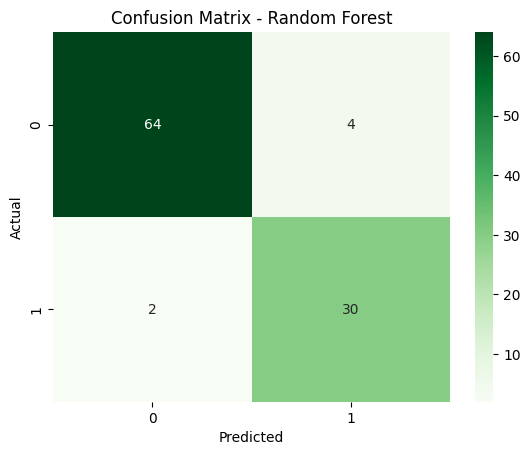

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

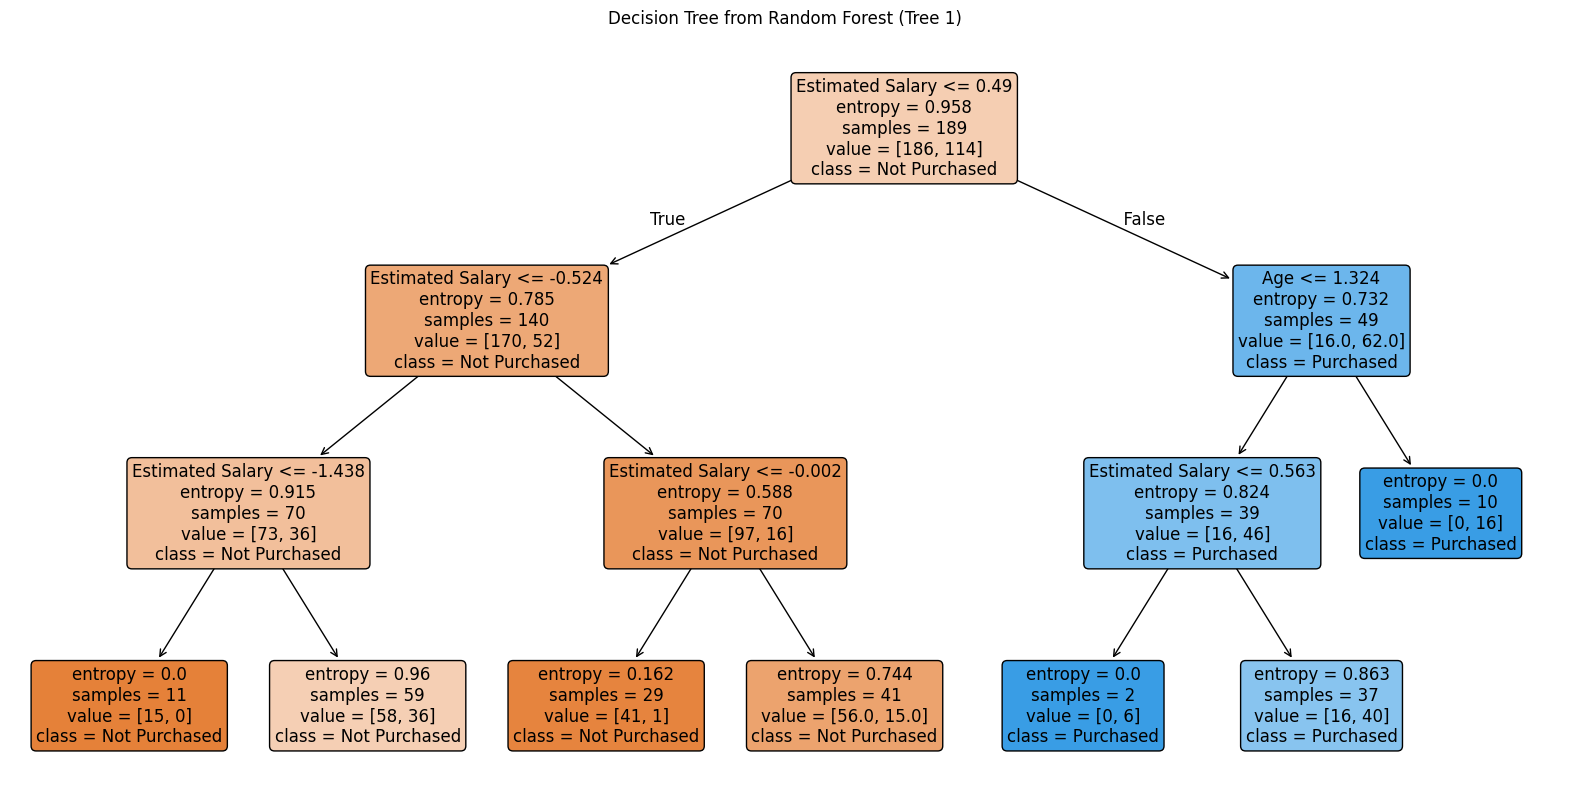

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(classifier.estimators_[1],#plotting 2nd decision tree
          feature_names=['Age', 'Estimated Salary'],
          class_names=['Not Purchased', 'Purchased'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.title("Decision Tree from Random Forest (Tree 1)")
plt.show()
#One can plot any no of trees